`Introduction générale`

Ce projet s'inscrit dans le domaine de la Vision par Ordinateur et du Machine Learning, visant à concevoir et implémenter un système capable de distinguer automatiquement des images appartenant à deux classes distinctes : les chiens et les chats.

L'objectif principal est de valider l'efficacité des méthodes classiques de traitement d'images pour la reconnaissance de formes. Nous démontrons qu'il est possible, sans avoir recours aux coûteux réseaux de neurones profonds (Deep Learning), d'atteindre une bonne précision en utilisant des techniques d'extraction de caractéristiques manuelles.

Notre approche repose sur trois étapes fondamentales, garantissant une classification robuste et interprétable :

1.Préparation des Données

2.Extraction de Caractéristiques

3.Classification et Modélisation

`Traitement`

***Importation des bibliothèques***

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


***1-Préparation des données***

1. Préparation des données images

In [2]:
CATEGORIES = ['Dog', 'Cat'] 
IMG_SIZE = 128 # On va redimensionner toutes les images à 128x128 pixels
def load_data():
    data = []   
    labels = [] 
    
    for category in CATEGORIES:
        path = category 
        class_num = CATEGORIES.index(category) 
        
        print(f"Chargement des images du dossier : {path}...")
        for img_name in os.listdir(path):
            try:
                
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path)
                
                if img is None: continue 

              
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
                data.append(resized)
                labels.append(class_num)
                
            except Exception as e:
                pass 

    return np.array(data), np.array(labels)

2. Application du prétraitement sur le dataset 

In [3]:
X_images, y = load_data()
counts=pd.Series(y).value_counts().sort_index()

Chargement des images du dossier : Dog...
Chargement des images du dossier : Cat...


3. Visualisation des données

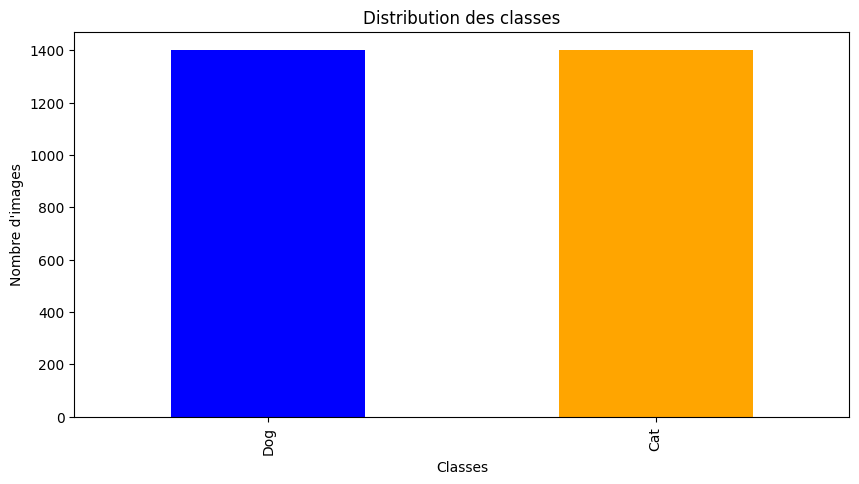

In [4]:
plt.figure(figsize=(10,5))
counts.plot(kind='bar',color=['blue', 'orange'])
plt.title('Distribution des classes')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'images')
plt.xticks(ticks=[0,1], labels=CATEGORIES)
plt.show()

<p style="color:#4A90E2; font-size:16px; font-weight:bold; margin-top:20px;">
Interprétation
</p>

<span style="font-size:14px; font-weight:bold;"> 
Ce graphique présente la distribution des classes dans un jeu de données d'entraînement pour un modèle de classification d'images, opposant chiens (Dog_Train) et chats (Cat_Train). On observe une répartition parfaitement équilibrée, avec approximativement 1400 images attribuées à chaque classe, soit un total de 2800 images. Cette égalité numérique constitue un atout majeur pour l'apprentissage automatique, car elle garantit que le modèle n'héritera d'aucun biais en faveur d'une classe particulière durant son entraînement. Un dataset ainsi équilibré favorise le développement d'un classifieur juste et performant, capable de reconnaître avec une égale fiabilité les deux types d'animaux.



4. Extraction des caractéristiques

<p style="color:red; font-size:16px; font-weight:bold; margin-top:20px;">
Fonctionnalité principale
</p>

<span style="font-size:14px; font-weight:bold;"> 
Le Histogram of Oriented Gradients (HOG) est un descripteur de caractéristiques en vision par ordinateur. Sa fonction principale est de décrire la forme et l'apparence locales d'un objet en quantifiant la distribution des gradients d'intensité (l'orientation des bords) dans des régions spécifiques d'une image. Il est largement utilisé pour la détection d'objets,grâce à sa robustesse aux variations d'éclairage.

In [5]:
def extract_hog_features(images):
    features=[]
    for image in images:
        hog_feature = hog(image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
        features.append(hog_feature)
    return np.array(features)
X_hog = extract_hog_features(X_images)
print("Extraction des caractéristiques HOG terminée !")
print(f"Nombre total d'images: {len(X_hog)}")
print(f"Taille des caractéristiques HOG: {X_hog.shape} valeurs")

Extraction des caractéristiques HOG terminée !
Nombre total d'images: 2801
Taille des caractéristiques HOG: (2801, 8100) valeurs


5. Division des données

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)
print(f"Taille du jeu d'entraînement: {X_train.shape[0]} images")
print(f"Taille du jeu de test: {X_test.shape[0]} images")

Taille du jeu d'entraînement: 2240 images
Taille du jeu de test: 561 images


***2-Application d'algorithmes de Machine Learning***

1. Fonction d'entraînement ,d'évaluation des modèles 

In [7]:
def train_evaluate(model, X_train, y_train, X_test, y_test):
    print(f"Entraînement du modèle {model.__class__.__name__}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    print("-" * 40)
    print(f"Précision globale (Accuracy) : {acc:.2%}")
    print("-" * 40)
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred, target_names=CATEGORIES))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CATEGORIES)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matrice de confusion pour {model.__class__.__name__}")
    plt.show()
    return acc
    


2. Entraînement et évaluation des modèles

(a) modèle SVM

Entraînement du modèle SVC
----------------------------------------
Précision globale (Accuracy) : 67.74%
----------------------------------------
Rapport de classification :
              precision    recall  f1-score   support

         Dog       0.69      0.66      0.67       281
         Cat       0.67      0.70      0.68       280

    accuracy                           0.68       561
   macro avg       0.68      0.68      0.68       561
weighted avg       0.68      0.68      0.68       561



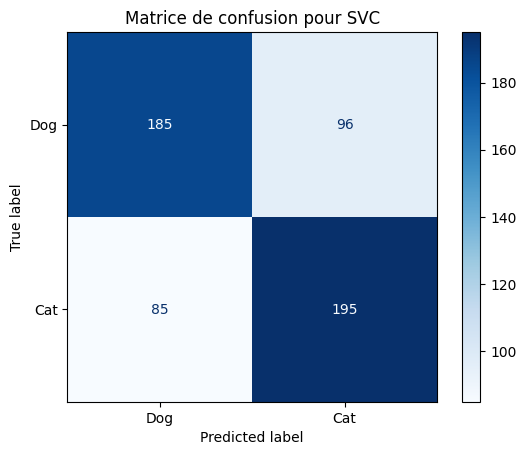

In [8]:
model_svc=SVC(kernel='linear', C=1.0, random_state=42)
accuracy=train_evaluate(model_svc, X_train, y_train, X_test, y_test)

(b) modèle Random Forest

Entraînement du modèle RandomForestClassifier
----------------------------------------
Précision globale (Accuracy) : 67.56%
----------------------------------------
Rapport de classification :
              precision    recall  f1-score   support

         Dog       0.69      0.64      0.66       281
         Cat       0.66      0.71      0.69       280

    accuracy                           0.68       561
   macro avg       0.68      0.68      0.68       561
weighted avg       0.68      0.68      0.68       561



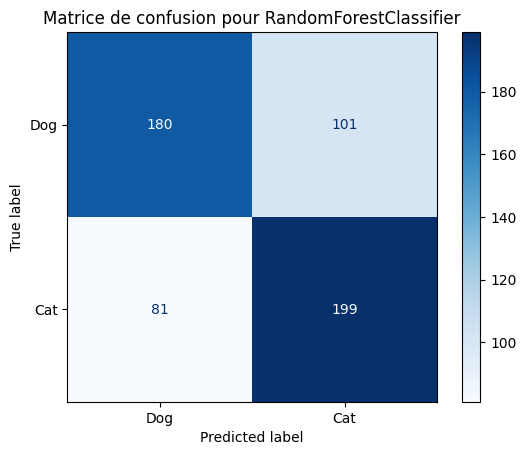

In [9]:
model_rf=RandomForestClassifier(n_estimators=100, random_state=42)
accuracy=train_evaluate(model_rf, X_train, y_train, X_test, y_test)

(c) modèle KNN

Entraînement du modèle KNeighborsClassifier
----------------------------------------
Précision globale (Accuracy) : 53.30%
----------------------------------------
Rapport de classification :
              precision    recall  f1-score   support

         Dog       0.52      0.99      0.68       281
         Cat       0.85      0.08      0.14       280

    accuracy                           0.53       561
   macro avg       0.68      0.53      0.41       561
weighted avg       0.68      0.53      0.41       561



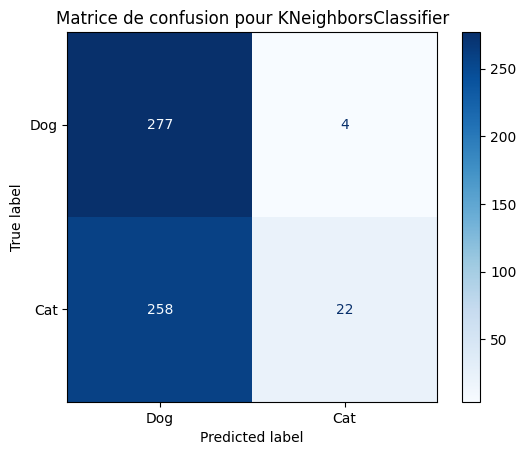

In [10]:
model_knn=KNeighborsClassifier(n_neighbors=5)
accuracy=train_evaluate(model_knn, X_train, y_train, X_test, y_test)

(d) modèle Decision Tree

Entraînement du modèle DecisionTreeClassifier
----------------------------------------
Précision globale (Accuracy) : 55.79%
----------------------------------------
Rapport de classification :
              precision    recall  f1-score   support

         Dog       0.56      0.53      0.55       281
         Cat       0.55      0.58      0.57       280

    accuracy                           0.56       561
   macro avg       0.56      0.56      0.56       561
weighted avg       0.56      0.56      0.56       561



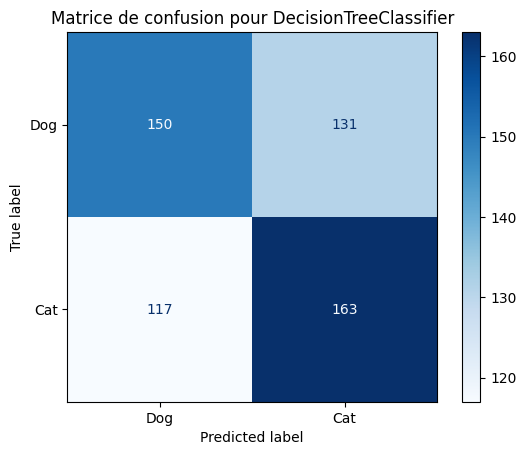

In [11]:
model_dt=DecisionTreeClassifier(random_state=42)
accuracy=train_evaluate(model_dt, X_train, y_train, X_test, y_test)

(e) modèle Logistic Regression

Entraînement du modèle LogisticRegression
----------------------------------------
Précision globale (Accuracy) : 67.56%
----------------------------------------
Rapport de classification :
              precision    recall  f1-score   support

         Dog       0.68      0.67      0.68       281
         Cat       0.67      0.68      0.68       280

    accuracy                           0.68       561
   macro avg       0.68      0.68      0.68       561
weighted avg       0.68      0.68      0.68       561



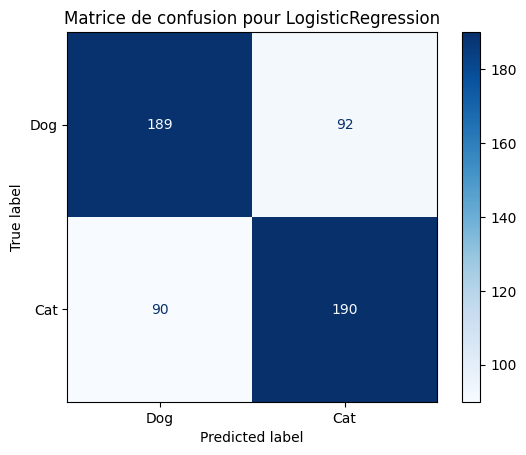

In [12]:
model_lr=LogisticRegression(max_iter=1000, random_state=42)
accuracy=train_evaluate(model_lr, X_train, y_train, X_test, y_test)

2. Classement des modèles

In [13]:
modeles_entraines={"SVM":model_svc,
                   "Random Forest":model_rf,
                   "KNN":model_knn,
                   "Decision Tree":model_dt,
                   "Logistic Regression":model_lr}

In [14]:
resultats = []
for nom_modele, modele in modeles_entraines.items():
    y_pred = modele.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultats.append({"modele": nom_modele, "accuracy": acc})

In [15]:
df_resultats = pd.DataFrame(resultats)
df_resultats = df_resultats.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
df_resultats

,modele,accuracy
0,SVM,0.677362
1,Random Forest,0.675579
2,Logistic Regression,0.675579
3,Decision Tree,0.557932
4,KNN,0.532977


<p style="color:#4A90E2; font-size:16px; font-weight:bold; margin-top:20px;">
Interprétation
</p>

<span style="font-size:14px; font-weight:bold;"> 
L'analyse des résultats d'exactitude (accuracy) des modèles révèle une performance supérieure et très similaire pour trois algorithmes : SVM (0,6774), Random Forest (0,6756) et Logistic Regression (0,6756). Ces modèles se regroupent autour de 67,5% à 67,7% d'exactitude, avec une légère avance pour le SVM. En revanche, les modèles de Decision Tree (0,5579) et KNN (0,5330) affichent une performance nettement inférieure, perdant plus de 10 points de pourcentage par rapport au groupe de tête. Cette disparité suggère que le problème de classification bénéficie grandement de l'approche non-linéaire ou de l'agrégation de modèles (comme avec SVM et Random Forest) par rapport aux modèles plus simples.

`Conclusion`

Le projet de classification d'images "Dogs vs. Cats", basé sur l'extraction des caractéristiques de forme via HOG (Histogram of Oriented Gradients), a démontré l'efficacité de l'approche classique de Vision par Ordinateur. L'évaluation comparative sur l'ensemble de test a permis d'établir un classement clair des modèles, le Support Vector Machine (SVM) se distinguant comme le classifieur optimal avec une précision de 67.74%. Cette performance, qui valide l'efficacité du SVM à séparer les classes dans l'espace des descripteurs HOG, était très similaire à celle du Random Forest et de la Régression Logistique. Inversement, les modèles moins complexes comme le k-NN et l'Arbre de Décision se sont montrés inadaptés à ce type de données. Pour une future amélioration, il sera crucial de dépasser les limites de ce score en explorant l'optimisation des hyper-paramètres du SVM ou en enrichissant les caractéristiques extraites afin d'intégrer des informations de texture.